In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3.1 Problem- 1: Getting Started with Data Exploration- Some Warm up


In [3]:
import pandas as pd
whr=pd.read_csv("/content/drive/MyDrive/Copy of WHR-2024-5CS037.csv")
whr.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
rows, columns = whr.shape
print(f"Number of rows: {rows},\nNumber of columns: {columns}")

Number of rows: 143,
Number of columns: 9


In [ ]:
whr.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [ ]:
scr_mean=whr["score"].mean()
scr_median=whr["score"].median()
scr_sd=whr["score"].std()
print(f"Mean: {scr_mean}, Median: {scr_median}, Standard Deviation: {scr_sd}")

Mean: 5.52758041958042, Median: 5.785, Standard Deviation: 1.1707165099442995


In [ ]:
high_score=whr.loc[whr["score"].idxmax(),"Country name"]
low_score=whr.loc[whr["score"].idxmin(),"Country name"]
print(f"High score: {high_score}\nlowest score: {low_score}")

High score: Finland
lowest score: Afghanistan


In [4]:
miss_value=whr.isnull().sum()
print(miss_value[miss_value>0])

Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
filter=whr[whr["score"]>7.5]
filter

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [ ]:
sort_gdp=filter.sort_values(by="Log GDP per capita", ascending=False)
sort_gdp.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [ ]:
def col_happiness(score):
  if score<4:
    return "Low"
  elif score>=4 and score<=6:
    return "Medium"
  else:
    return "High"
whr["Happiness_Category"]=whr["score"].apply(col_happiness)
whr.head()

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


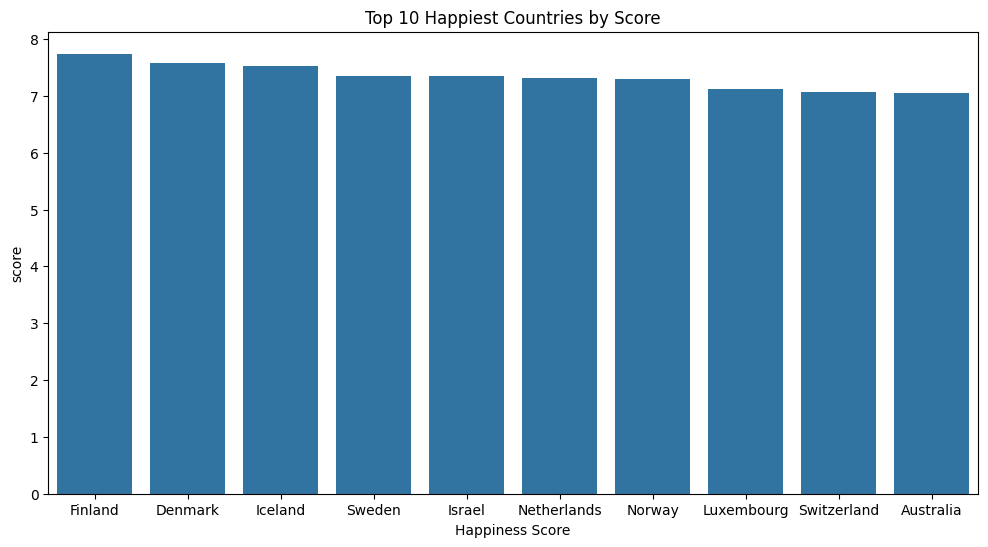

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


happiest=whr.sort_values(by="score", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=happiest, x="Country name", y="score")
plt.title("Top 10 Happiest Countries by Score")
plt.xlabel("Happiness Score")
plt.show()

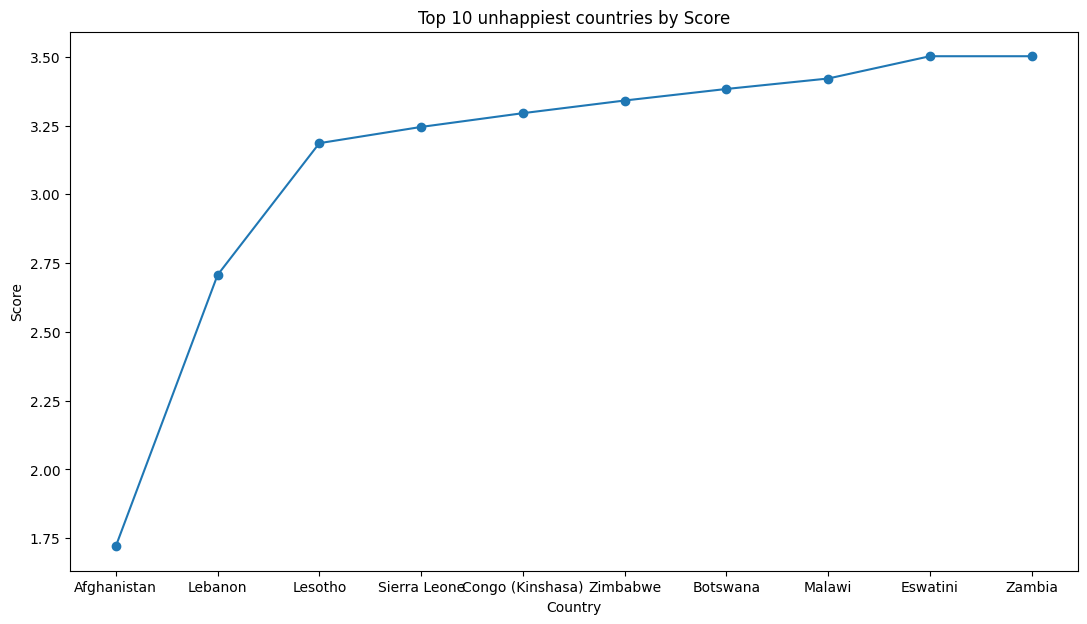

In [ ]:


unhappiest=whr.sort_values(by="score", ascending=True).head(10)

plt.figure(figsize=(13,7))
plt.plot(unhappiest["Country name"], unhappiest["score"], marker="o")
plt.title("Top 10 unhappiest countries by Score")
plt.xlabel("Country")
plt.ylabel("Score")
plt.show()

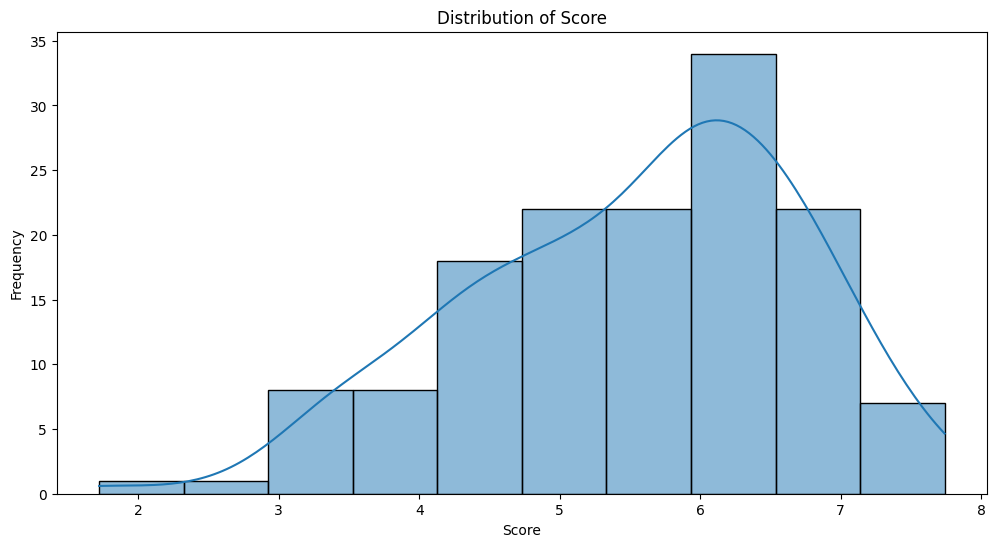

In [ ]:


plt.figure(figsize=(12,6))
sns.histplot(whr["score"], kde=True)
plt.title("Distribution of Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

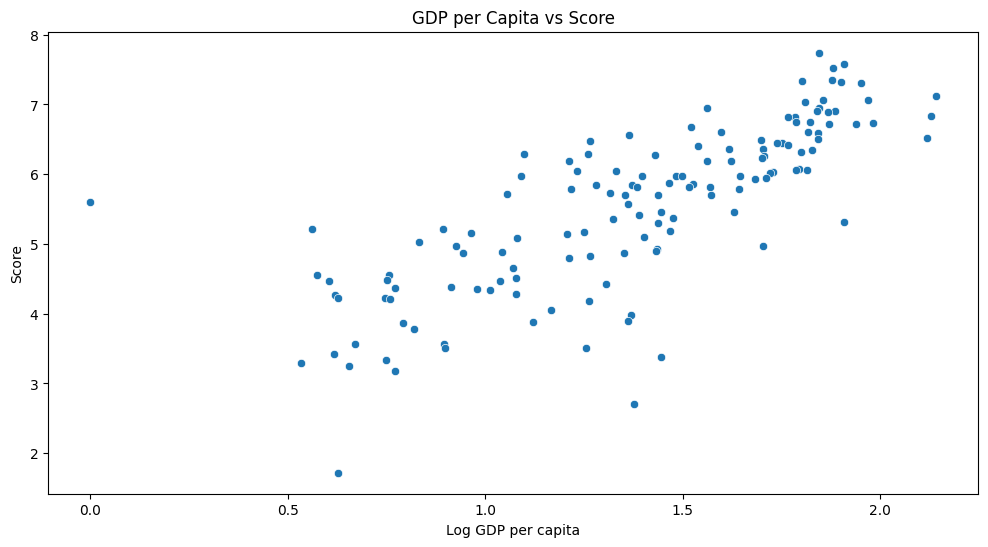

In [ ]:


plt.figure(figsize=(12,6))
sns.scatterplot(data=whr, x="Log GDP per capita", y="score")
plt.title("GDP per Capita vs Score")
plt.ylabel("Score")
plt.show()

Problem 2 Some Advance Data Exploration Task

In [ ]:
sAsian_countries=["Afghanistan","Bangladesh","Bhutan","India","Maldives","Nepal","Pakistan","Srilanka"]

#  2. Use the list from step- 1 to filtered the dataset {i.e. filtered out matching dataset from list.
sAsian_df = whr[whr['Country name'].isin(sAsian_countries)]
print(sAsian_df)

#  3. Save the filtered dataframe as separate CSV files for future use.
sAsian_df.to_csv("sAsia_Coutries.csv",index=False)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

<ipython-input-16-312a7dedf0c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sAsian_df["Composite Score"]=(0.40*sAsian_df["Log GDP per capita"]+0.30*sAsian_df["Social support"]+0.30*sAsian_df["Healthy life expectancy"])


    Country name  Composite Score
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


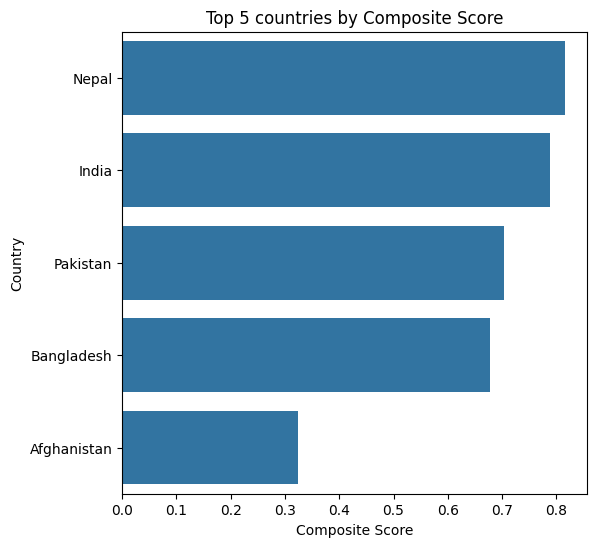

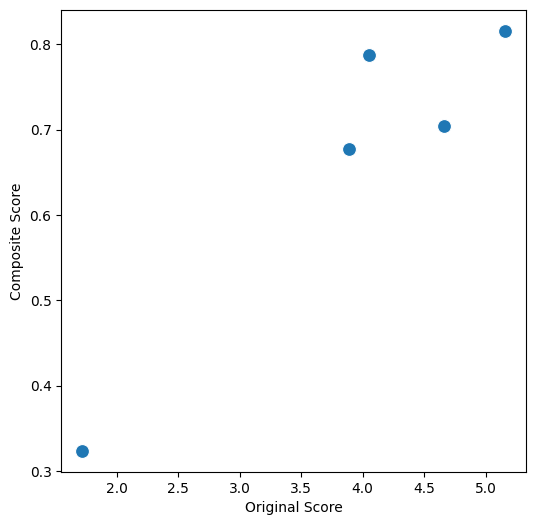

In [ ]:

sAsian_df["Composite Score"]=(0.40*sAsian_df["Log GDP per capita"]+0.30*sAsian_df["Social support"]+0.30*sAsian_df["Healthy life expectancy"])

sAsian_df=sAsian_df.sort_values(by="Composite Score", ascending=False)
print(sAsian_df[["Country name", "Composite Score"]])

top=sAsian_df.head(5)

plt.figure(figsize=(6,6))
sns.barplot(data=top, x="Composite Score", y="Country name")
plt.title("Top 5 countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(data=sAsian_df, x="score", y="Composite Score",s=100)
plt.xlabel("Original Score")
plt.ylabel("Composite Score")
plt.show()

In [ ]:

q1_gdp = sAsian_df['Log GDP per capita'].quantile(0.25)
q3_gdp = sAsian_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

q1_score = sAsian_df['score'].quantile(0.25)
q3_score = sAsian_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

lower_gdp = q1_gdp - 1.5 * iqr_gdp
upper_gdp = q3_gdp + 1.5 * iqr_gdp
lower_score = q1_score - 1.5 * iqr_score
upper_score = q3_score + 1.5 * iqr_score

outliers = sAsian_df[
    (sAsian_df['Log GDP per capita'] < lower_gdp) |
    (sAsian_df['Log GDP per capita'] > upper_gdp) |
    (sAsian_df['score'] < lower_score) |
    (sAsian_df['score'] > upper_score)
]
outliers

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness_Category,Composite Score
142,Afghanistan,1.721,0.628,0.0,0.242,0.0,0.091,0.088,0.672,Low,0.3238


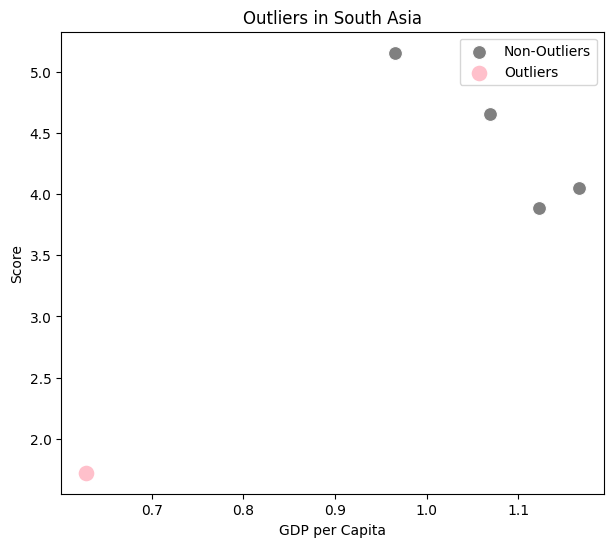

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=sAsian_df, x="Log GDP per capita", y="score", label="Non-Outliers", color="grey", s=100)
sns.scatterplot(data=outliers,x="Log GDP per capita", y="score",label="Outliers",color="pink",s=150)
plt.title("Outliers in South Asia")
plt.xlabel("GDP per Capita")
plt.ylabel("Score")
plt.show()

Task 4 Exploring Trends Across Metrics

In [ ]:

#1. Choose two metrics (eg. Freedom to Make life choices and generosity) and calculate their correlation (person correlation) with the score for the south asian countries
correlation=sAsian_df["Freedom to make life choices"].corr(sAsian_df["score"])
generosity=sAsian_df["Generosity"].corr(sAsian_df["score"])

print("Freedom Correlation: ",correlation)
print("Generosity Correlation: ",generosity)

Freedom Correlation:  0.801497903141921
Generosity Correlation:  0.8773326267276359


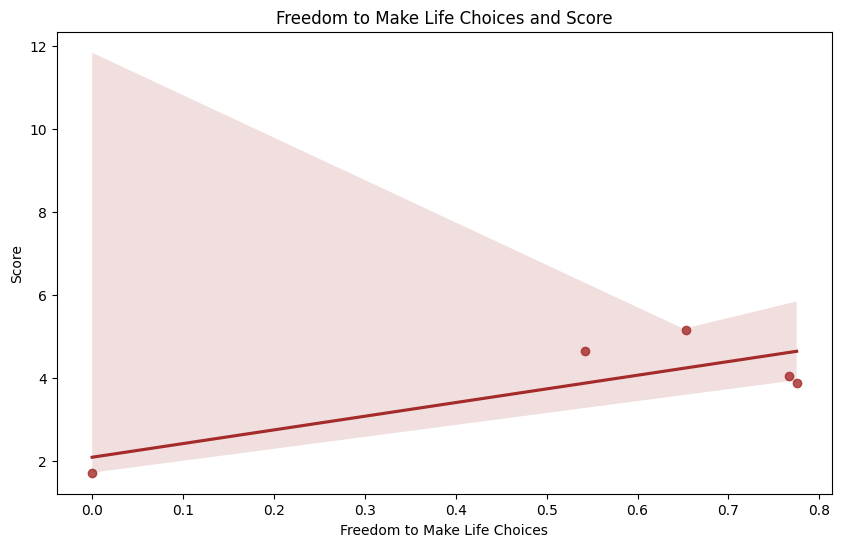

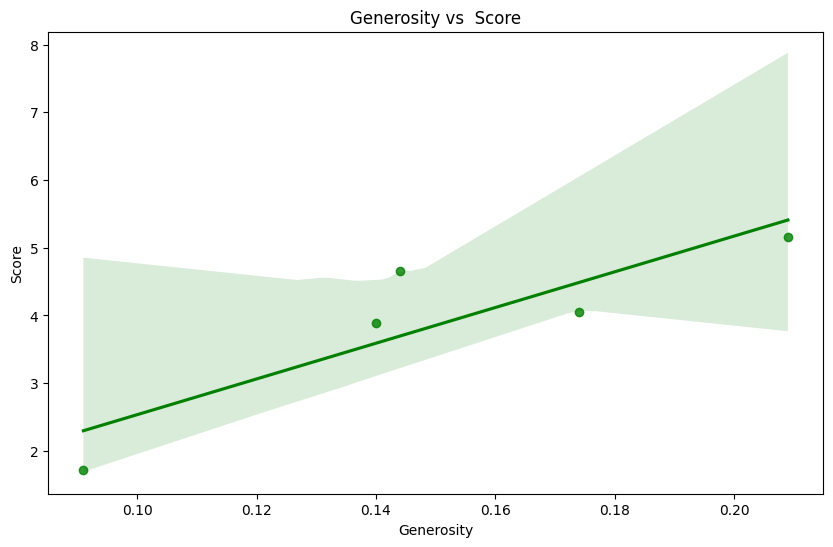

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=sAsian_df, x="Freedom to make life choices", y="score", color="brown" )
plt.title("Freedom to Make Life Choices and Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=sAsian_df, x='Generosity', y='score', color='green')
plt.title('Generosity vs  Score')
plt.xlabel('Generosity')
plt.ylabel('Score')
plt.show()

Task 5 Gap Analysis

In [ ]:


sAsian_df=pd.read_csv("/content/sAsia_Coutries.csv")
sAsian_df["GDP-Score Gap"]=sAsian_df["Log GDP per capita"]-sAsian_df["score"]

scoreGap_asc=sAsian_df.sort_values(by="GDP-Score Gap",ascending=True)
scoreGap_desc=sAsian_df.sort_values(by="GDP-Score Gap",ascending=False)

asc=scoreGap_asc[["Country name","GDP-Score Gap"]].head(3)
print(asc)
desc=scoreGap_desc[["Country name","GDP-Score Gap"]].head(3)
print(desc)

  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
  Country name  GDP-Score Gap
4  Afghanistan         -1.093
3   Bangladesh         -2.764
2        India         -2.888


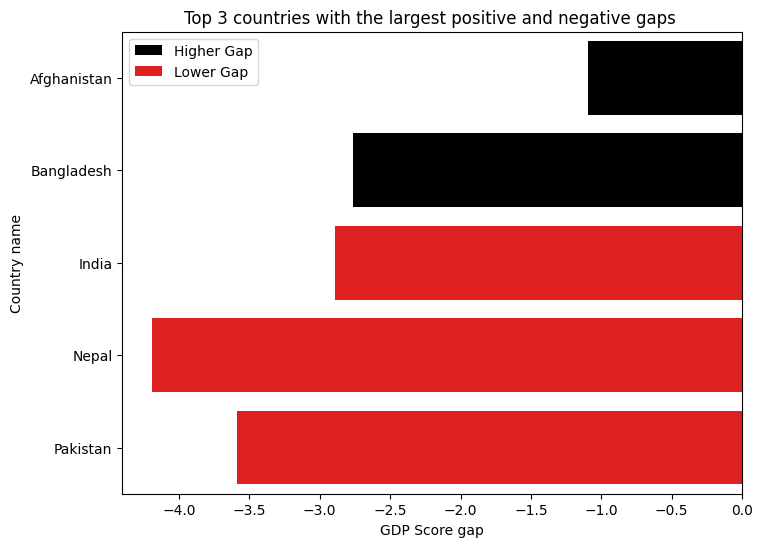

In [ ]:
highgap=scoreGap_desc.head(3)
lowgap=scoreGap_asc.head(3)

plt.figure(figsize=(8,6))
sns.barplot(data=highgap, x="GDP-Score Gap", y="Country name",color="Black",label="Higher Gap")
sns.barplot(data=lowgap, x="GDP-Score Gap", y="Country name",color="red",label="Lower Gap")
plt.title("Top 3 countries with the largest positive and negative gaps ")
plt.xlabel("GDP Score gap")
plt.ylabel("Country name")
plt.show()

Problem 3 Comparative Analysis


In [ ]:
middle_east_countries=[ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
midEast_df = whr[whr['Country name'].isin(middle_east_countries)]
midEast_df.to_csv("midEast_Countries.csv",index=False)

In [ ]:

sAsia_mean=sAsian_df["score"].mean()
midEast_mean=midEast_df["score"].mean()

sAsia_std=sAsian_df["score"].std()
midEast_std=midEast_df["score"].std()

print(f"\nSouth Asia \n Mean: {sAsia_mean} \n Standard Deviation: {sAsia_std}")
print(f"\nMiddle East \n Mean: {midEast_mean} \n Standard Deviation: {midEast_std}")


South Asia 
 Mean: 3.8952000000000004 
 Standard Deviation: 1.3160025455902433

Middle East 
 Mean: 5.412100000000001 
 Standard Deviation: 1.5662011684327144


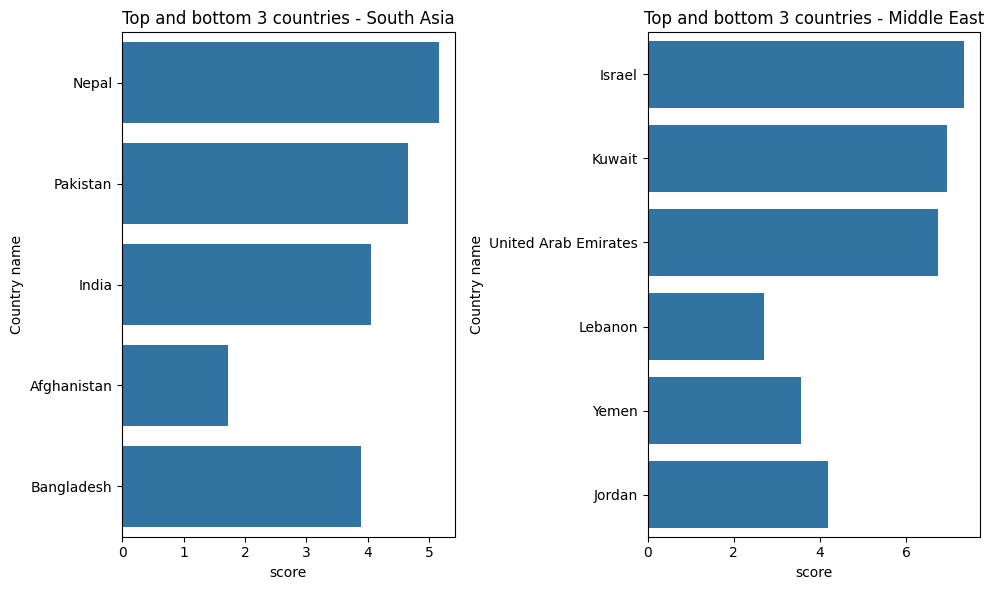

In [ ]:

sAsia_top=sAsian_df.nlargest(3,"score")
midEast_top=midEast_df.nlargest(3,"score")

sAsia_bottom=sAsian_df.nsmallest(3,"score")
midEast_bottom=midEast_df.nsmallest(3,"score")

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x="score",y="Country name",data=pd.concat([sAsia_top, sAsia_bottom]))
plt.title("Top and bottom 3 countries - South Asia")

plt.subplot(1,2,2)
sns.barplot(x="score",y="Country name",data=pd.concat([midEast_top, midEast_bottom]))
plt.title("Top and bottom 3 countries - Middle East")

plt.tight_layout()
plt.show()

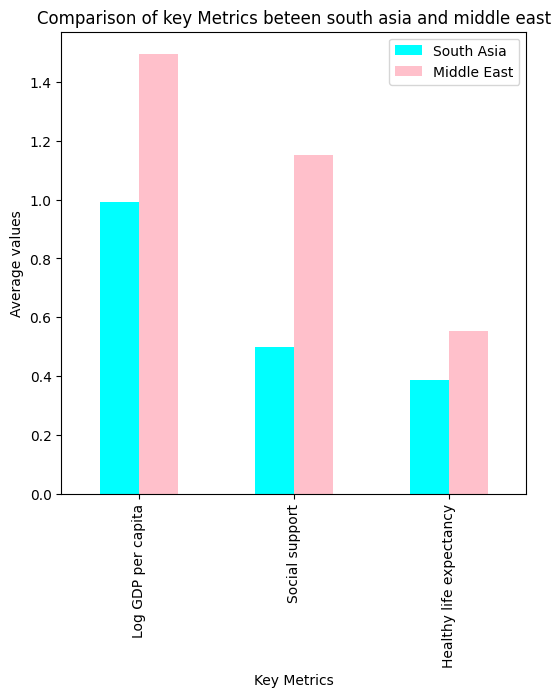

In [ ]:

comp=["Log GDP per capita", "Social support", "Healthy life expectancy"]

sAsia_mean_pick=sAsian_df[comp].mean()
midEast_mean_pick=midEast_df[comp].mean()

comp_df=pd.DataFrame({"South Asia":sAsia_mean_pick,"Middle East":midEast_mean_pick})

comp_df.plot(kind="bar", figsize=(6,6), color=["cyan","pink"])
plt.title("Comparison of key Metrics beteen south asia and middle east")
plt.ylabel("Average values")
plt.xlabel("Key Metrics")
plt.show()

In [ ]:

def compt(df,clmn):
  range=df[clmn].max()-df[clmn].min()
  cv=df[clmn].std()/df[clmn].mean()
  return range, cv

sAsian_range, sAsian_cv = compt(sAsian_df, 'score')
midEast_range, midEast_cv = compt(midEast_df, 'score')

print(f"\nSouth Asia \n Range: {sAsian_range} \n CV: {sAsian_cv}")
print(f"\nMiddle East \n Range: {midEast_range} \n CV: {midEast_cv}")


South Asia 
 Range: 3.4370000000000003 
 CV: 0.3378523684509764

Middle East 
 Range: 4.634 
 CV: 0.28938880812119405


Correlation of Score with Freedom to make life choices
South Asia: 0.801497903141921
Middle East: 0.8632202433827544
Correlation of Score with Generosity
South Asia: 0.8773326267276358
Middle East: 0.6275236536964182


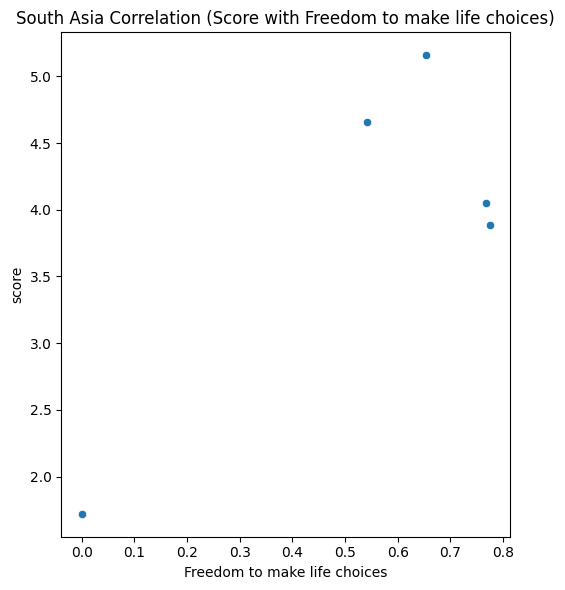

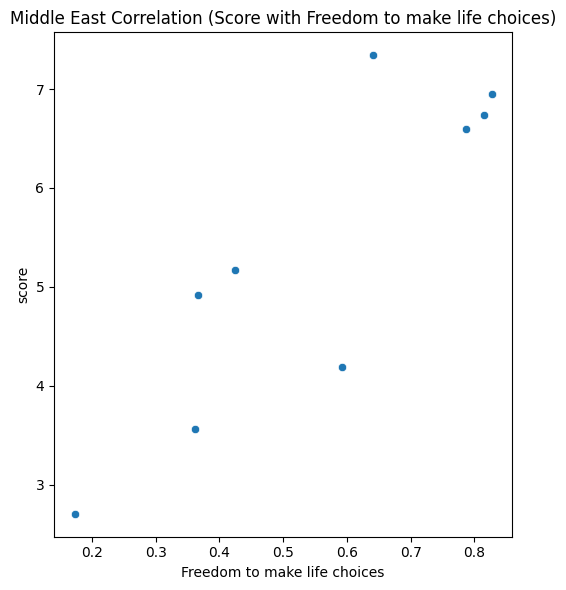

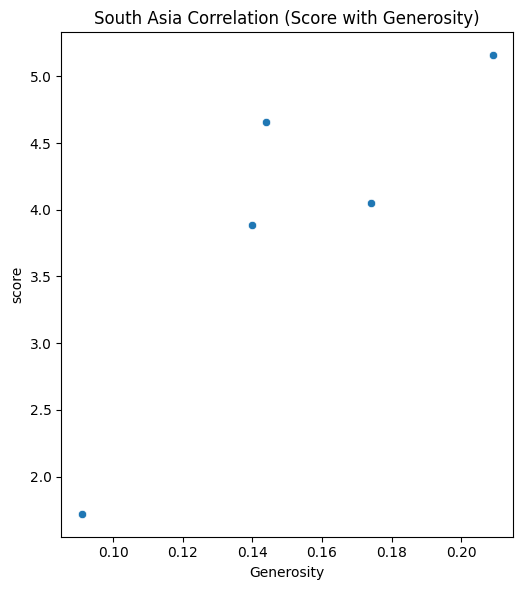

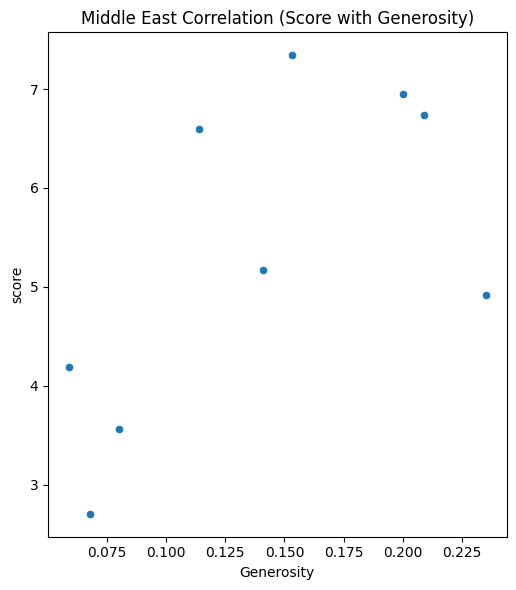

In [ ]:

metrics=["Freedom to make life choices","Generosity"]

for m in metrics:
  print(f"Correlation of Score with {m}")
  print("South Asia:", sAsian_df['score'].corr(sAsian_df[m]))
  print("Middle East:", midEast_df['score'].corr(midEast_df[m]))

for m in metrics:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.scatterplot(x=m, y="score",data=sAsian_df)
  plt.title(f"South Asia Correlation (Score with {m})")
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.scatterplot(x=m, y="score",data=midEast_df)
  plt.title(f"Middle East Correlation (Score with {m})")
  plt.tight_layout()
  plt.show()

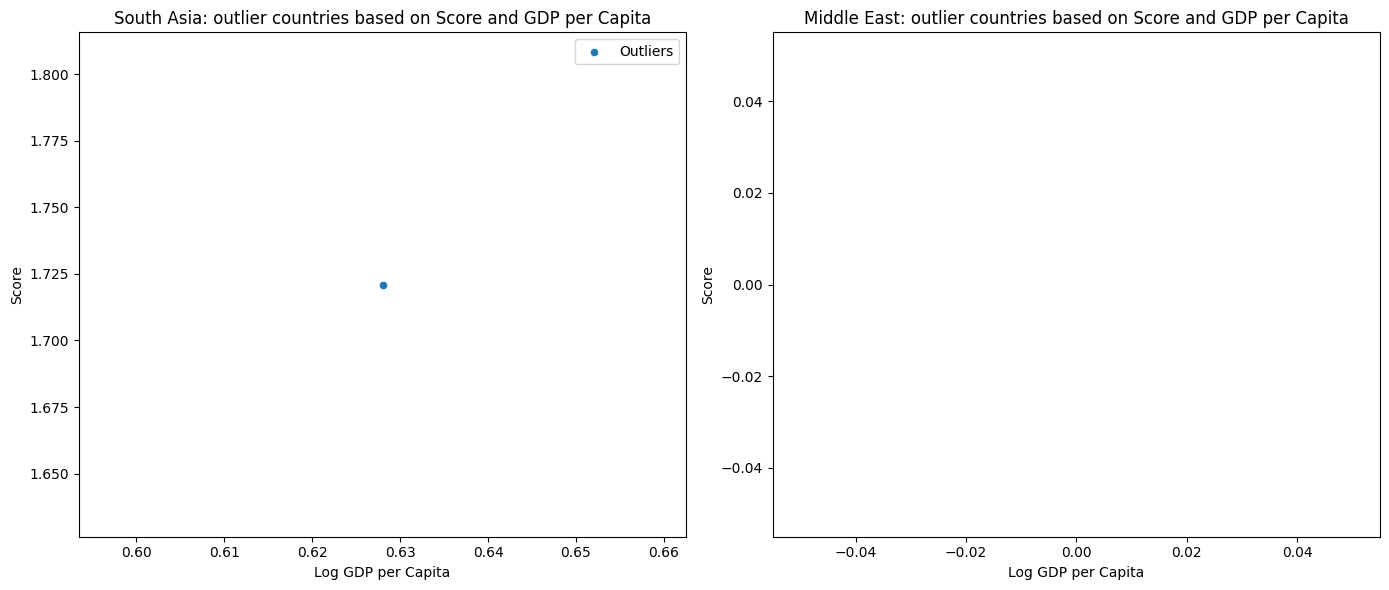

In [ ]:

def outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

sAsian_out_score=outlier(sAsian_df,"score")
midEast_out_score=outlier(midEast_df,"score")

sAsian_out_gdp=outlier(sAsian_df,"score")
midEast_out_gdp=outlier(midEast_df,"score")

sAsian_outliers=pd.concat([sAsian_out_score,sAsian_out_gdp]).drop_duplicates()
midEast_outliers=pd.concat([midEast_out_score,midEast_out_gdp]).drop_duplicates()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=sAsian_outliers, x='Log GDP per capita', y='score', label='Outliers')
plt.title("South Asia: outlier countries based on Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Score")

plt.subplot(1, 2, 2)
sns.scatterplot(data=midEast_outliers, x='Log GDP per capita', y='score', label='Outliers')
plt.title("Middle East: outlier countries based on Score and GDP per Capita")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Score")

plt.tight_layout()
plt.show()



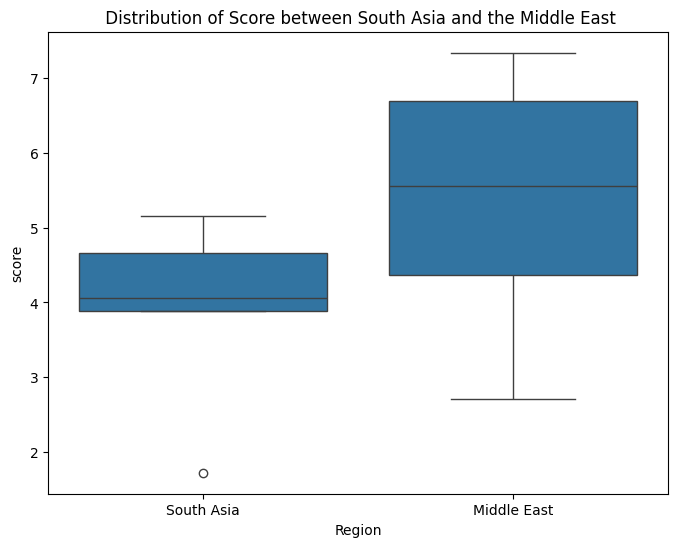

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score',data=pd.concat([sAsian_df.assign(Region="South Asia"),midEast_df.assign(Region="Middle East")]))
plt.title(" Distribution of Score between South Asia and the Middle East")
plt.show()